Plot Q-score~Relative position on reads

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pysam

# 
path_workdir = Path("/home/b05b01002/HDD/project_nanoprep_re")
names = [
    "egr-109-bio1",
    "egr-109-bio2",
    "lch-109-bio1",
    "lch-109-bio2",
    "ptr-109-bio1",
    "ptr-109-bio2",
    "ptr-111-bio1",
    "ont-10x-human",
    "ont-visium-mouse",
    "mouse-retina-subset1",
    "mouse-retina-subset2"
]
accuracies = [
    "sup",
    "hac",
    "fast"
]

# mean_q
def mean_q(qscore_array):
    q2phred = {q: 10 ** (q / -10) for q in range(0, 129)}
    phred = [q2phred[i] for i in qscore_array]
    mean_phred = sum(phred) / len(phred)
    mean_q = -10 * np.log10(mean_phred)
    return mean_q


Basecalled samples

In [22]:
data = pd.DataFrame()
for name in names[:-2]:
    for accuracy in accuracies:
        filename = path_workdir / f"outputs/Basecalling/aggregate_fastq/{name}_{accuracy}.fq"
        with pysam.FastxFile(filename) as fh:
            mean_q_list = [mean_q(entry.get_quality_array()) for entry in fh]
        data_sample = pd.DataFrame({"mean_q": mean_q_list})
        data_sample["name"] = name
        data_sample["accuracy"] = accuracy
        data = pd.concat([data, data_sample])

Pre-called samples

In [23]:
filename = path_workdir / "rawdata/rui-chen-lab/Ms_bulk_subset1.fastq.gz"
with pysam.FastxFile(filename) as fh:
    mean_q_list = [mean_q(entry.get_quality_array()) for entry in fh]
data_sample = pd.DataFrame({"mean_q": mean_q_list})
data_sample["name"] = "mouse-retina-subset1"
data_sample["accuracy"] = "sup"
data = pd.concat([data, data_sample])

In [24]:
filename = path_workdir / "rawdata/rui-chen-lab/Ms_bulk_subset2.fastq.gz"
with pysam.FastxFile(filename) as fh:
    mean_q_list = [mean_q(entry.get_quality_array()) for entry in fh]
data_sample = pd.DataFrame({"mean_q": mean_q_list})
data_sample["name"] = "mouse-retina-subset2"
data_sample["accuracy"] = "sup"
data = pd.concat([data, data_sample])

Plot distribution of Mean Q

In [25]:
data["name_accuracy"] = data["name"] + "_" + data["accuracy"]
data["chemistry"] = data["name"].map({
    "egr-109-bio1": "R9",
    "egr-109-bio2": "R9",
    "lch-109-bio1": "R9",
    "lch-109-bio2": "R9",
    "ptr-109-bio1": "R9",
    "ptr-109-bio2": "R9",
    "ptr-111-bio1": "R9",
    "ont-10x-human": "R10",
    "ont-visium-mouse": "R10",
    "mouse-retina-subset1": "R10",
    "mouse-retina-subset2": "R10"
})

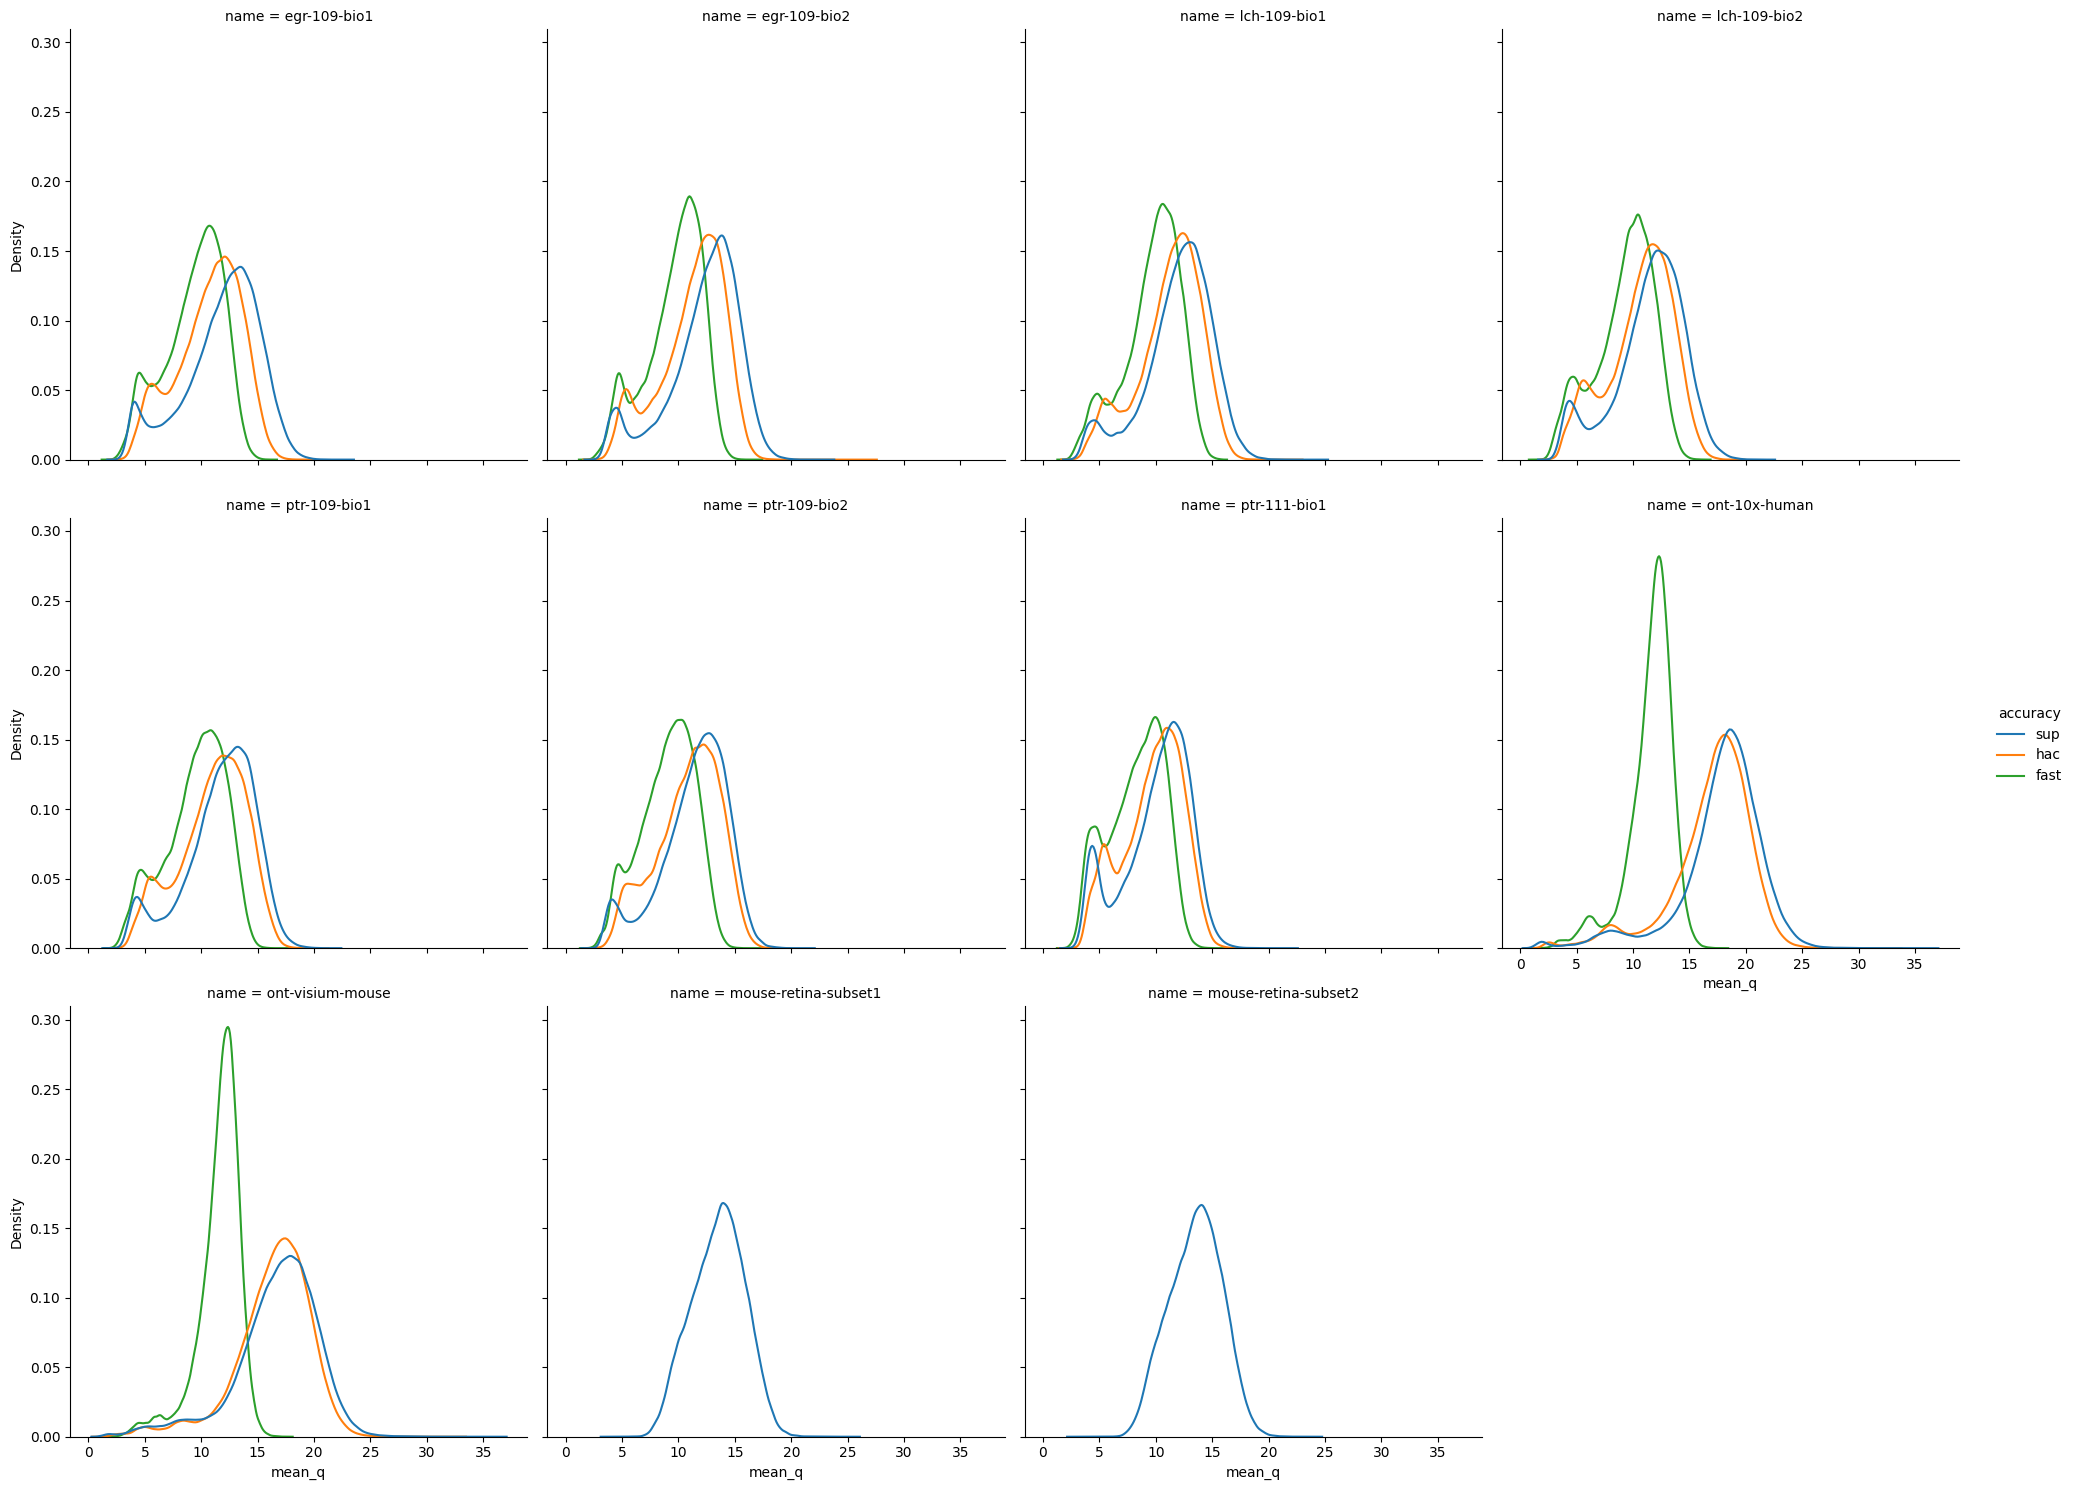

In [26]:
hue = "accuracy"
ax = sns.displot(
    data=data,
    x="mean_q",
    hue=hue,
    kind="kde",
    bw_adjust=.8,
    common_norm=False,
    col="name",
    col_wrap=4,
    palette="tab10"
)
plt.savefig("output/mean_q_distribution.svg")